In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
from google.colab import files

In [4]:
# Step 1: Upload Files in Google Colab
print("Please upload the students and courses CSV files.")
uploaded = files.upload()

# Step 2: Load Datasets
students_df = pd.read_csv('students_updated.csv')
courses_df = pd.read_csv('courses_cleaned.csv')

Please upload the students and courses CSV files.


Saving courses_cleaned.csv to courses_cleaned.csv
Saving students_updated.csv to students_updated.csv


In [5]:
# Step 3: Feature Selection & Target Variable
# Features (X) and target (y)
X = students_df[['gpa', 'attendance', 'extracurricular', 'career_goal']]  # Features
y = students_df['success']  # Target variable (success or failure)

# Preprocessing pipeline
numeric_features = ['gpa', 'attendance']  # Numeric features to scale
categorical_features = ['career_goal']  # Categorical features to encode

# Use ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(), categorical_features)  # Encode categorical features
    ])

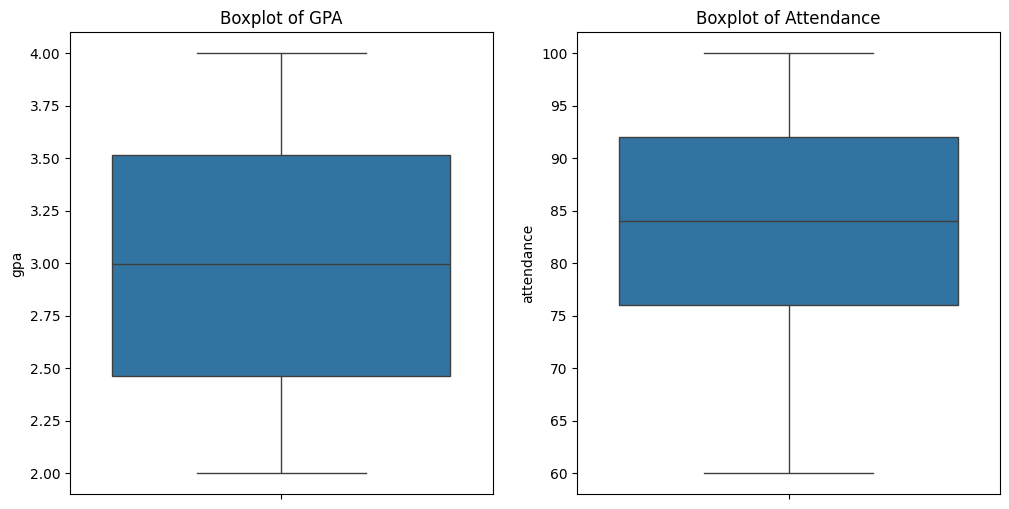

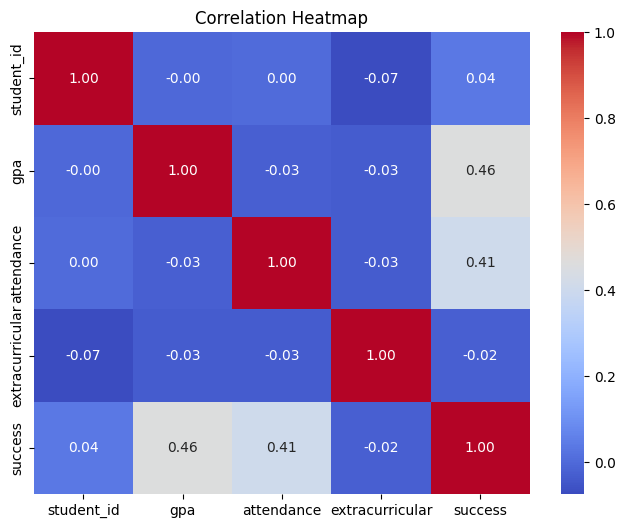

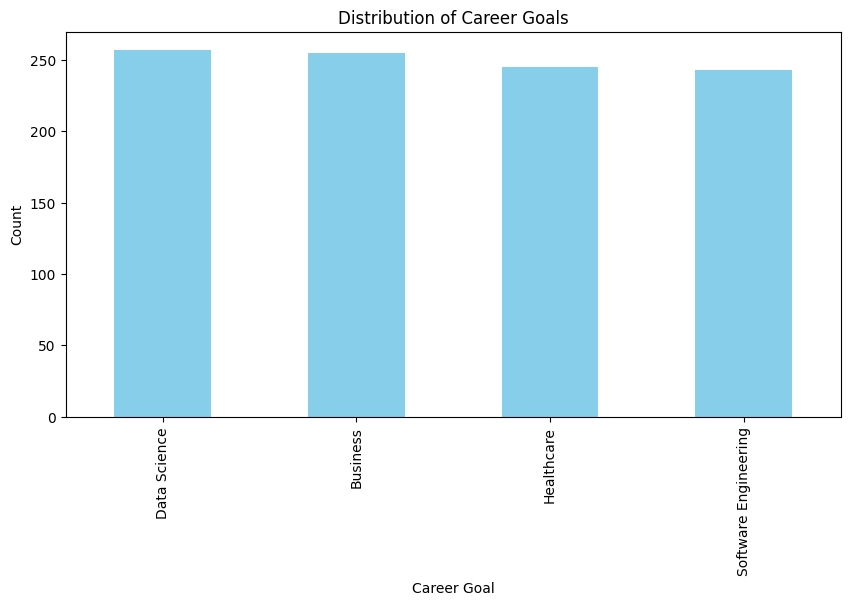

In [6]:
# Step 4: Data Visualization
# Separate Boxplots for Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=students_df['gpa'], ax=axes[0])
axes[0].set_title("Boxplot of GPA")
sns.boxplot(y=students_df['attendance'], ax=axes[1])
axes[1].set_title("Boxplot of Attendance")
plt.show()

# Heatmap of Correlation Matrix (Excluding Non-Numeric Columns)
numeric_data = students_df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Bar graph for career goals
plt.figure(figsize=(10, 5))
students_df['career_goal'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Career Goals")
plt.xlabel("Career Goal")
plt.ylabel("Count")
plt.show()

In [7]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Define and Train the Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['gpa', 'attendance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['career_goal'])])),
                ('classifier', LogisticRegression(max_iter=500))])

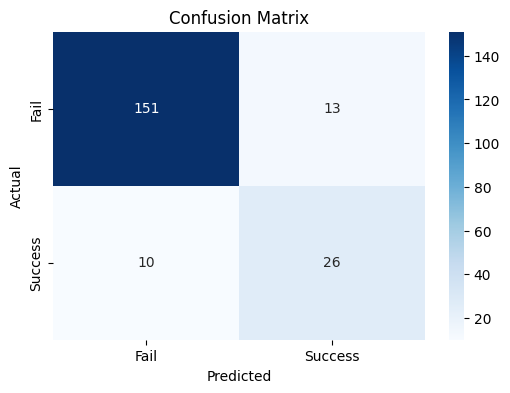

Accuracy: 0.89
F1-Score: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       164
           1       0.67      0.72      0.69        36

    accuracy                           0.89       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.89      0.89      0.89       200



In [8]:

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Improved Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Success'], yticklabels=['Fail', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Classification Report:\n', report)

In [ ]:
# Step 8: Save and Download the Trained Model
model_filename = 'course_recommendation_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')
files.download(model_filename)

In [1]:
def recommend_courses(student_id):
    student_info = students_df[students_df['student_id'] == student_id]
    if student_info.empty:
        print("Student ID not found.")
        return pd.DataFrame()

    student_career_goal = student_info['career_goal'].iloc[0]
    print(f"Detected Career Goal: {student_career_goal}")

    achievements = input("Enter any achievements or skills (comma separated): ")
    interests = input("Enter other areas of interest (comma separated): ")

    recommended_courses = courses_df[courses_df['course_name'].str.contains(student_career_goal, case=False, na=False)]

    additional_courses = pd.DataFrame()

    if achievements.strip():
        achievements_pattern = '|'.join([ach.strip() for ach in achievements.split(',')])
        additional_courses = pd.concat([
            additional_courses,
            courses_df[courses_df['course_name'].str.contains(achievements_pattern, case=False, na=False)]
        ])

    if interests.strip():
        interests_pattern = '|'.join([interest.strip() for interest in interests.split(',')])
        additional_courses = pd.concat([
            additional_courses,
            courses_df[courses_df['course_name'].str.contains(interests_pattern, case=False, na=False)]
        ])

    # Combine and remove duplicates
    recommended_courses = pd.concat([recommended_courses, additional_courses]).drop_duplicates(subset=['course_name'])

    # If still empty, recommend beginner-level courses
    if recommended_courses.empty:
        print("No specific courses found matching your profile. Suggesting beginner courses.")
        recommended_courses = courses_df[courses_df['prerequisites'].isnull()]

    return recommended_courses[['course_name', 'difficulty']].reset_index(drop=True)

# Example Usage:
student_id_to_recommend = 100
print(f"\nRecommended Courses for Student ID {student_id_to_recommend}:\n")
recommended_df = recommend_courses(student_id_to_recommend)
print(recommended_df)



Recommended Courses for Student ID 100:



NameError: name 'students_df' is not defined